In [1]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2 as cv
from numpy.random import seed
seed(45)
import pickle
import pandas as pd
import re,json

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage import io
from glob import glob 
import datetime
%matplotlib inline
%load_ext tensorboard


Init Plugin
Init Graph Optimizer
Init Kernel


In [21]:
%cd /Users/barakasoka/Desktop

/Users/barakasoka/Desktop


In [5]:
 CUSTOM_MODEL_NAME = 'FinalModel_1' 


In [6]:
paths = {
    'WORKSPACE_PATH': os.path.join('SAVE', 'workspace'),
    'SCRIPTS_PATH': os.path.join('SAVE','scripts'),
    'METADATA_PATH': os.path.join('SAVE','metadata'),
    'DATASET_PATH': os.path.join('SAVE','Datasets'),
    'NONCERVIX_PATH': os.path.join('SAVE','non_cervix'),
    'IMAGE_PATH': os.path.join('SAVE', 'workspace','images'),
    'TRAIN_PATH': os.path.join('SAVE', 'workspace','images','train'),
    'VALID_PATH': os.path.join('SAVE','workspace','images','valid' ),
    'TRAINPOS_PATH': os.path.join('SAVE','workspace','images','train','positive'),
    'TRAINNEG_PATH': os.path.join('SAVE','workspace','images','train','negative'),
    'VALIDPOS_PATH': os.path.join('SAVE','workspace','images','valid','positive'),
    'VALIDNEG_PATH': os.path.join('SAVE','workspace','images','valid','negative'),
    'SORTED_PATH': os.path.join('SAVE', 'workspace','images','sorted'),
    'MODEL_PATH': os.path.join('SAVE', 'workspace','models'),
    'OUTPUT_PATH': os.path.join('SAVE', 'workspace','models',CUSTOM_MODEL_NAME), 
 }

In [7]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

#### meta data exploration

In [ ]:
#RUN A SCRIPT TO IMPORT A META TO THE META PATH

In [22]:
meta_data= pd.read_csv(os.path.join(paths['METADATA_PATH'],"meta_data.csv"))
meta_data

,id,screen_date,age,hiv_status,parity,reviewer_assessment,provider_assessment,country,region,district,image1,image2,image3
0,128,1-Jul-16,10-Jan-87,Negative,5.860000e+02,1,1,Tanzania,Arusha,Monduli,uploads/img_20160701_162527_2.png,NaN,NaN
1,129,1-Jul-16,10-Jan-87,Unknown,8.500000e+01,1,1,Tanzania,Arusha,Monduli,uploads/img_20160701_164156_2.png,NaN,NaN
2,130,22-Jan-16,1-Jul-90,Unknown,8.568898e+06,0,1,Tanzania,Arusha,Arusha Municipal,uploads/img_20160701_165328_2.png,NaN,NaN
3,131,1-Jul-16,1-Jul-90,Unknown,8.668550e+05,0,1,Tanzania,Arusha,Arusha Municipal,uploads/img_20160701_165547_2.png,NaN,/storage/emulated/0/Pictures/img_20160701_1655...
4,132,1-Jul-16,10-Jan-87,Unknown,8.648689e+09,0,1,Tanzania,Arusha,Arusha Municipal,uploads/img_20160701_170845_2.png,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23459,24107,24-Feb-21,36,Negative,3.000000e+00,0,0,Tanzania,Kilimanjaro,Moshi District Council,public/uploads/img_20210224_124556_8558.png,public/uploads/img_20210224_124639_7088.png,NaN
23460,24108,24-Feb-21,22,Negative,1.000000e+00,0,0,Tanzania,Kagera,Karagwe,public/uploads/img_20210224_125947_8962.png,public/uploads/img_20210224_130001_3019.png,NaN
23461,24109,24-Feb-21,28,Negative,0.000000e+00,0,0,Tanzania,Kagera,Bukoba Municipal,public/uploads/img_20210224_131141_1660.png,public/uploads/img_20210224_131431_9253.png,NaN
23462,24110,24-Feb-21,22,Negative,0.000000e+00,0,0,Tanzania,Kigoma,Kasulu,public/uploads/img_20210224_134348_2461.png,NaN,NaN


In [24]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23464 entries, 0 to 23463
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   23464 non-null  int64  
 1   screen_date          23463 non-null  object 
 2   age                  23464 non-null  object 
 3   hiv_status           23464 non-null  object 
 4   parity               23463 non-null  float64
 5   reviewer_assessment  23066 non-null  object 
 6   provider_assessment  23464 non-null  int64  
 7   country              23462 non-null  object 
 8   region               23462 non-null  object 
 9   district             23464 non-null  object 
 10  image1               23464 non-null  object 
 11  image2               23256 non-null  object 
 12  image3               22899 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 2.3+ MB


In [ ]:
#MANUAL CLEANING OF THE CERVIX IMAGES FROM NON-CERVIX

In [12]:
print(len(os.listdir(paths['DATASET_PATH'])))
print(len(os.listdir(paths['NONCERVIX_PATH'])))

57000
9652


In [ ]:
#RUN A SORT SCRIPT FROM DATASET TO SORTED PATH

In [14]:
print(os.listdir(paths['SORTED_PATH']))

['positive_validation', '.DS_Store', 'negative_validation', 'positive_train', 'positive_only_train', 'negative_train', 'positive_only_validation', 'positive_suspect_validation', 'positive_suspect_train']


#### exploring the image data

/Users/barakasoka/Desktop/SAVE/workspace/images/sorted
/Users/barakasoka/Desktop/SAVE/workspace/images/sorted/positive_train
3376
<class 'numpy.ndarray'>
(1032, 581, 3)
1
255
(256, 256, 3)


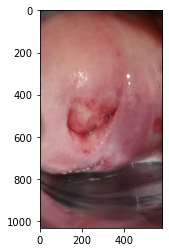

In [10]:
%cd /Users/barakasoka/Desktop/SAVE/workspace/images/sorted
%cd positive_train/
# post_dir=os.path.join(paths['SORTED_PATH'],'positive_train')
post_dir='/Users/barakasoka/Desktop/SAVE/workspace/images/sorted/positive_train'
ls= os.listdir(post_dir)
print(len(ls))
# ls2= []
# for i in ls:
#     im= cv.imread(i)
#     im2=cv.cvtColor(im, cv.COLOR_BGR2RGB)
#     ls2.append(im2)
#     if len(ls2) == 4:
#         break
    
im= cv.imread(ls[10])
im2=cv.cvtColor(im, cv.COLOR_BGR2RGB)
print(type(im)) 
print(im.shape)
print(im.min())
print(im.max())
small_im = cv.resize(im,(256,256))
print(small_im.shape)
plt.imshow(im2)

#### manual labeling and cropped by the oncologist to the train and valid path

/Users/barakasoka/Desktop/SAVE/workspace/images/train/positive
/Users/barakasoka/Desktop/SAVE/workspace/images/train/negative


Text(0, 0.5, 'Negative samples')

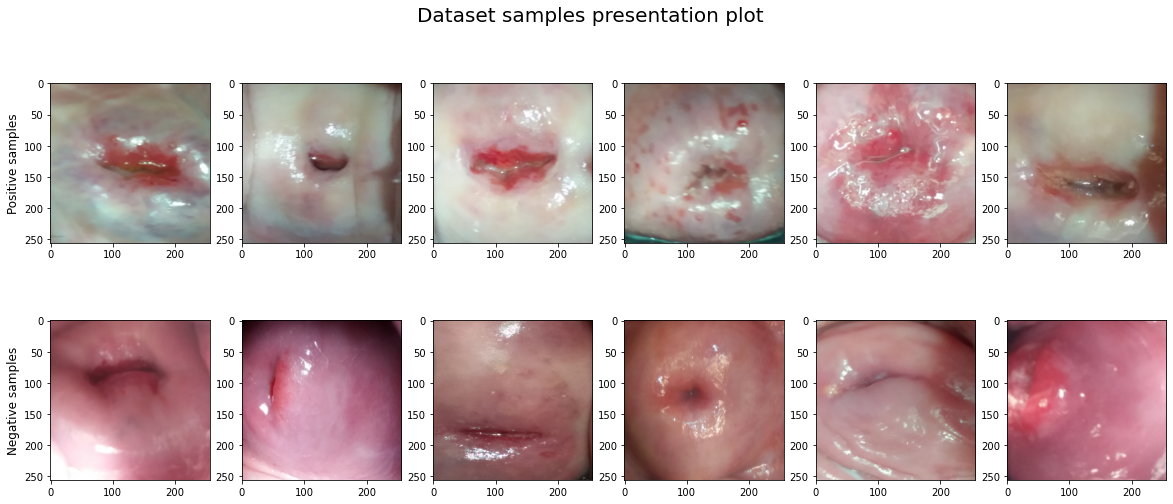

In [14]:
%cd /Users/barakasoka/Desktop/SAVE/workspace/images/train/positive
positivedir= "/Users/barakasoka/Desktop/SAVE/workspace/images/train/positive"
positive_images = []
poslist= os.listdir(positivedir)
for sample in poslist:
    img = cv.imread(sample)
    small_im = cv.resize(img,(256,256))
    RGB_img = cv.cvtColor(small_im, cv.COLOR_BGR2RGB)
    positive_images.append(RGB_img)
    if len(positive_images)==6:
        break
%cd /Users/barakasoka/Desktop/SAVE/workspace/images/train/negative
negativedir= "/Users/barakasoka/Desktop/SAVE/workspace/images/train/negative"
negative_images= []
neglist= os.listdir(negativedir)        
for i in neglist:
    img = cv.imread(i)
    small_im = cv.resize(img,(256,256))
    negative_images.append(small_im)
    if len(negative_images)==6:
        break
fig,axis = plt.subplots(2,6,figsize=(20,8))
fig.suptitle('Dataset samples presentation plot',fontsize=20)
for i,img in enumerate(positive_images):
#     RGB_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    axis[0,i].imshow(img)
    rect = patches.Rectangle((50,50),150,150,linewidth=4,edgecolor='g',facecolor='none', linestyle=':', capstyle='round')
axis[0,0].set_ylabel('Positive samples', size='large')
for i,img in enumerate(negative_images):
    RGB_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    axis[1,i].imshow(RGB_img)
    rect = patches.Rectangle((50,50),150,150,linewidth=4,edgecolor='r',facecolor='none', linestyle=':', capstyle='round')
axis[1,0].set_ylabel('Negative samples', size='large')

    

#### cropped image

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
datagen= ImageDataGenerator()

plt_im=positive_images[2]
batch_im= plt_im.reshape((1,)+ plt_im.shape)
pad_im= tf.image.resize_with_crop_or_pad(batch_im, 150,  150)

print(pad_im.shape)
# plt.imshow(pad_im)
i=0
for batch in datagen.flow(pad_im, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0])) 
    i += 1
#     if i % 2 == 0:
    break 
plt.show()

#### visualize the distribution of pixels

/Users/barakasoka/Desktop/SAVE/workspace/images/train/positive
Wrong path:
90
/Users/barakasoka/Desktop/SAVE/workspace/images/train/negative
Wrong path:
102
102
90


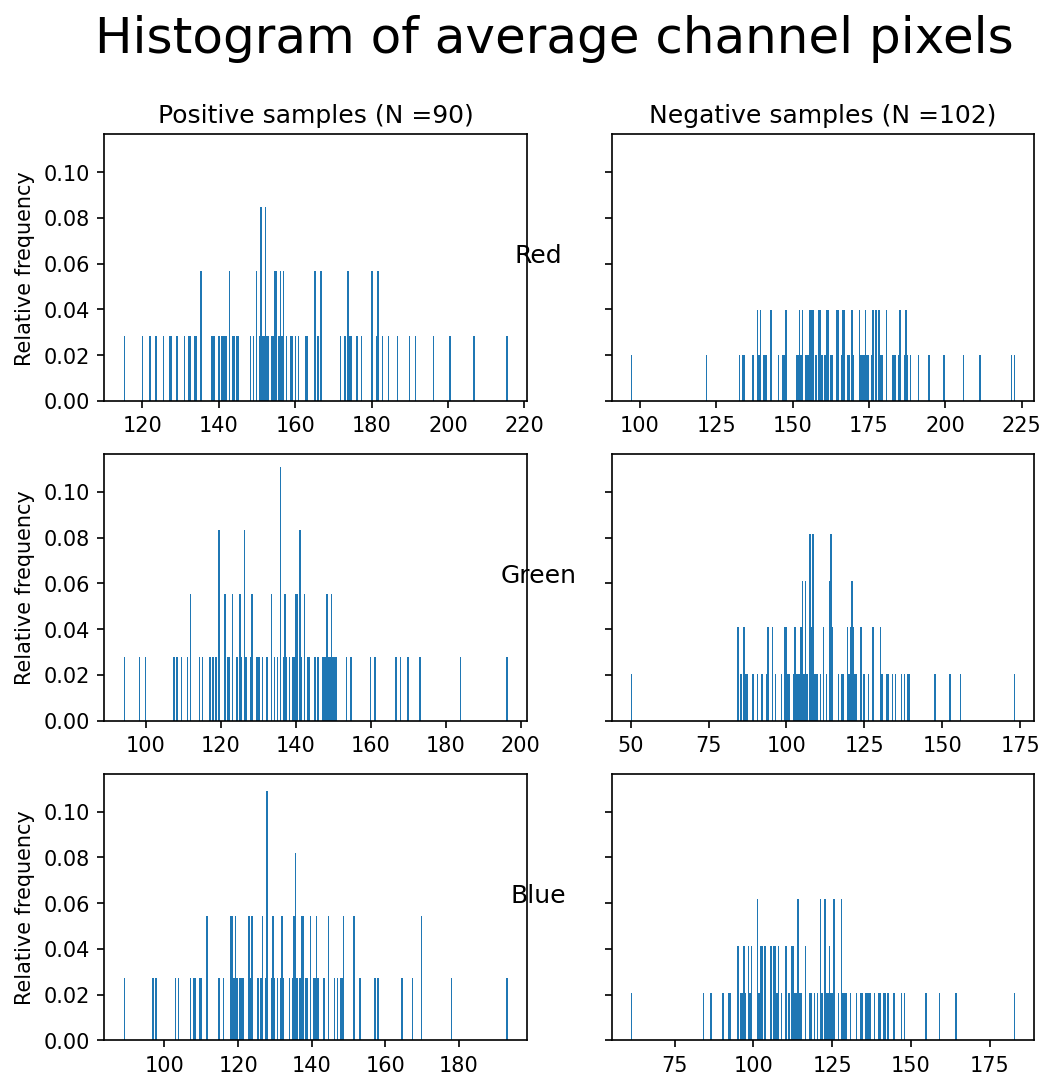

In [18]:
## channels pixels for positive samples
%cd /Users/barakasoka/Desktop/SAVE/workspace/images/train/positive
positivedir= "/Users/barakasoka/Desktop/SAVE/workspace/images/train/positive"
positive_images = []
poslist= os.listdir(positivedir)
for sample in poslist:
    img = cv.imread(sample)
    if img is None:
        print('Wrong path:')
    else:
        small_im = cv.resize(img,(256,256))
        RGB_img = cv.cvtColor(small_im, cv.COLOR_BGR2RGB)
        positive_images.append(RGB_img)
pos_r_pixels_mean = []
pos_g_pixels_mean = []
pos_b_pixels_mean = []
for i in positive_images:
    img=np.array(i)
    r_pixels = round(img[:, :, 0].flatten().mean(),2)
    g_pixels = round(img[:, :, 1].flatten().mean(),2)
    b_pixels = round(img[:, :, 2].flatten().mean(),2)
    pos_r_pixels_mean.append(r_pixels)
    pos_g_pixels_mean.append(g_pixels)
    pos_b_pixels_mean.append(b_pixels)
print(len(positive_images))

## channels pixels for negative samples
%cd /Users/barakasoka/Desktop/SAVE/workspace/images/train/negative
negativedir= "/Users/barakasoka/Desktop/SAVE/workspace/images/train/negative"
negative_images= []
neglist= os.listdir(negativedir)
for i in neglist:
    img = cv.imread(i)
    if img is None:
        print('Wrong path:')
    else:
        small_im = cv.resize(img,(256,256))
        RGB_img = cv.cvtColor(small_im, cv.COLOR_BGR2RGB)
        negative_images.append(RGB_img)
neg_r_pixels_mean = []
neg_g_pixels_mean = []
neg_b_pixels_mean = []
for i in negative_images:
    img=np.array(i)
    r_pixels = round(img[:, :, 0].flatten().mean(),2)  
    g_pixels = round(img[:, :, 1].flatten().mean(),2)
    b_pixels = round(img[:, :, 2].flatten().mean(),2)
    neg_r_pixels_mean.append(r_pixels)
    neg_g_pixels_mean.append(g_pixels)
    neg_b_pixels_mean.append(b_pixels)    
print(len(negative_images))
print(len(neg_r_pixels_mean))
print(len(pos_r_pixels_mean))

nr_of_bins = 256 #each possible pixel value will get a bin in the following histograms
fig,axs = plt.subplots(3,2,sharey=True,figsize=(8,8),dpi=150)
fig.suptitle('Histogram of average channel pixels', fontsize= 24)
#RGB channels
axs[0,0].hist(pos_r_pixels_mean,bins=nr_of_bins,density=True)
axs[0,1].hist(neg_r_pixels_mean,bins=nr_of_bins,density=True)
axs[1,0].hist(pos_g_pixels_mean,bins=nr_of_bins,density=True)
axs[1,1].hist(neg_g_pixels_mean,bins=nr_of_bins,density=True)
axs[2,0].hist(pos_b_pixels_mean,bins=nr_of_bins,density=True)
axs[2,1].hist(neg_b_pixels_mean,bins=nr_of_bins,density=True)
#Set image labels
axs[0,0].set_title("Positive samples (N =" + str(len(positive_images)) + ")");
axs[0,1].set_title("Negative samples (N =" + str(len(negative_images)) + ")");
axs[0,1].set_ylabel("Red",rotation='horizontal',labelpad=35,fontsize=12)
axs[1,1].set_ylabel("Green",rotation='horizontal',labelpad=35,fontsize=12)
axs[2,1].set_ylabel("Blue",rotation='horizontal',labelpad=35,fontsize=12)
for i in range(3):
    axs[i,0].set_ylabel("Relative frequency")